# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importing Dataset

In [2]:
dataset=pd.read_csv(r"Covid_Dataset.csv")
dataset.head()

,Age,Sex,BP max,BP min,Pr,RR,T,SPo2,DM,HTN,...,HCO3,BE,BUN,Cr,AST,ALT,ALKP,LDH,Outcome,Death Interval
0,38,0,105,70,110,19.0,37.0,88.0,0,0,...,22.7,-1.8,11,1.13,36.4,20.3,152.0,655.0,1,NaN
1,66,1,160,95,65,19.0,37.0,95.0,0,1,...,30.9,6.3,9,1.00,33.0,19.0,183.0,652.0,1,NaN
2,71,0,130,80,70,17.0,37.0,91.0,1,0,...,22.5,-2.2,13,1.19,48.9,46.2,155.0,389.0,1,NaN
3,94,1,100,60,100,21.0,37.5,89.0,0,0,...,24.3,1.6,23,1.00,29.0,17.0,177.0,627.0,0,7.0
4,55,1,90,60,90,20.0,35.5,96.0,1,1,...,25.1,1.5,17,0.89,22.0,18.0,804.0,334.0,1,NaN


# Data Description and visualisation 

In [3]:
dataset.describe

<bound method NDFrame.describe of      Age  Sex  BP max   BP min   Pr    RR     T   SPo2   DM  HTN  ...  HCO3  \
0     38    0      105       70  110  19.0  37.0   88.0   0    0  ...  22.7   
1     66    1      160       95   65  19.0  37.0   95.0   0    1  ...  30.9   
2     71    0      130       80   70  17.0  37.0   91.0   1    0  ...  22.5   
3     94    1      100       60  100  21.0  37.5   89.0   0    0  ...  24.3   
4     55    1       90       60   90  20.0  35.5   96.0   1    1  ...  25.1   
..   ...  ...      ...      ...  ...   ...   ...    ...  ..  ...  ...   ...   
487   74    1      140       80   88  15.0  37.9   80.0   1    1  ...  17.7   
488   76    0      135       65   65  20.0  36.6   65.0   0    0  ...  19.7   
489   49    0      130       80   99  18.0  37.8   95.0   1    0  ...  26.1   
490   62    0      121       67   97  24.0  37.6   97.0   1    1  ...  15.5   
491   34    1       90       60   75  19.0  36.5   46.0   0    0  ...  21.3   

       BE  BUN   

In [4]:
print(dataset['Outcome'].value_counts())
print(dataset['Sex'].value_counts())

1    306
0    186
Name: Outcome, dtype: int64
0    297
1    195
Name: Sex, dtype: int64


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

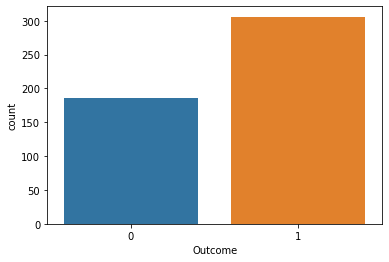

In [5]:
sns.countplot(dataset['Outcome'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

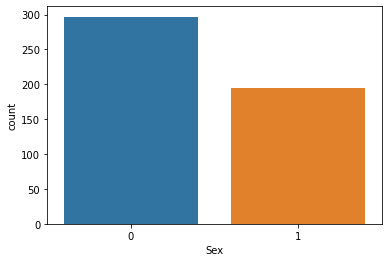

In [6]:
sns.countplot(dataset['Sex'])

# Data Preprocessing

In [7]:
dataset.isnull().sum()

Age                 0
Sex                 0
BP max              0
BP min              0
Pr                  0
RR                  1
T                   0
SPo2                3
DM                  0
HTN                 0
CVD                 0
WBC                 0
Abs Neut            0
Abs Lymph           0
RBC                 0
HGB                 1
HCT                 0
PLT                 0
MCV                 0
MCH                 0
MCHC                0
RDW                19
ESR                20
PT                  0
PTT                 1
INR                 0
PH                  0
PCO2                0
PO2                 0
HCO3                0
BE                  0
BUN                 0
Cr                  0
AST                 1
ALT                 0
ALKP                1
LDH                15
Outcome             0
Death Interval    307
dtype: int64

In [8]:
mode=dataset.iloc[:,7].mode()
print(mode)

0    88.0
dtype: float64


In [9]:
dataset=dataset.fillna({'LDH':dataset['LDH'].mean()})
dataset=dataset.fillna({'AST':dataset['AST'].mean()})
dataset=dataset.fillna({'ALKP':dataset['ALKP'].mean()})
dataset=dataset.fillna({'PTT':dataset['PTT'].mean()})
dataset=dataset.fillna({'ESR':dataset['ESR'].mean()})
dataset=dataset.fillna({'RDW':dataset['RDW'].mean()})
dataset=dataset.fillna({'HGB':dataset['HGB'].mean()})
dataset=dataset.fillna({'SPo2':mode})

In [10]:
dataset.isnull().sum()

Age                 0
Sex                 0
BP max              0
BP min              0
Pr                  0
RR                  1
T                   0
SPo2                3
DM                  0
HTN                 0
CVD                 0
WBC                 0
Abs Neut            0
Abs Lymph           0
RBC                 0
HGB                 0
HCT                 0
PLT                 0
MCV                 0
MCH                 0
MCHC                0
RDW                 0
ESR                 0
PT                  0
PTT                 0
INR                 0
PH                  0
PCO2                0
PO2                 0
HCO3                0
BE                  0
BUN                 0
Cr                  0
AST                 0
ALT                 0
ALKP                0
LDH                 0
Outcome             0
Death Interval    307
dtype: int64

In [11]:
dataset.drop(["Death Interval"],axis=1,inplace= True)       #Dropping "Death Interval" coloumn.     

In [12]:
dataset=dataset.dropna()

In [13]:
dataset.isnull().sum()

Age          0
Sex          0
BP max       0
BP min       0
Pr           0
RR           0
T            0
SPo2         0
DM           0
HTN          0
CVD          0
WBC          0
Abs Neut     0
Abs Lymph    0
RBC          0
HGB          0
HCT          0
PLT          0
MCV          0
MCH          0
MCHC         0
RDW          0
ESR          0
PT           0
PTT          0
INR          0
PH           0
PCO2         0
PO2          0
HCO3         0
BE           0
BUN          0
Cr           0
AST          0
ALT          0
ALKP         0
LDH          0
Outcome      0
dtype: int64

In [14]:
dataset.shape

(489, 38)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'BP max '}>,
        <AxesSubplot:title={'center':'BP min '}>,
        <AxesSubplot:title={'center':'Pr '}>,
        <AxesSubplot:title={'center':'RR '}>],
       [<AxesSubplot:title={'center':'T '}>,
        <AxesSubplot:title={'center':'SPo2 '}>,
        <AxesSubplot:title={'center':'DM'}>,
        <AxesSubplot:title={'center':'HTN'}>,
        <AxesSubplot:title={'center':'CVD'}>,
        <AxesSubplot:title={'center':'WBC'}>],
       [<AxesSubplot:title={'center':'Abs Neut'}>,
        <AxesSubplot:title={'center':'Abs Lymph'}>,
        <AxesSubplot:title={'center':'RBC'}>,
        <AxesSubplot:title={'center':'HGB'}>,
        <AxesSubplot:title={'center':'HCT'}>,
        <AxesSubplot:title={'center':'PLT'}>],
       [<AxesSubplot:title={'center':'MCV'}>,
        <AxesSubplot:title={'center':'MCH'}>,
        <AxesSubplot:title={'center':'MCHC'}>,
        <Ax

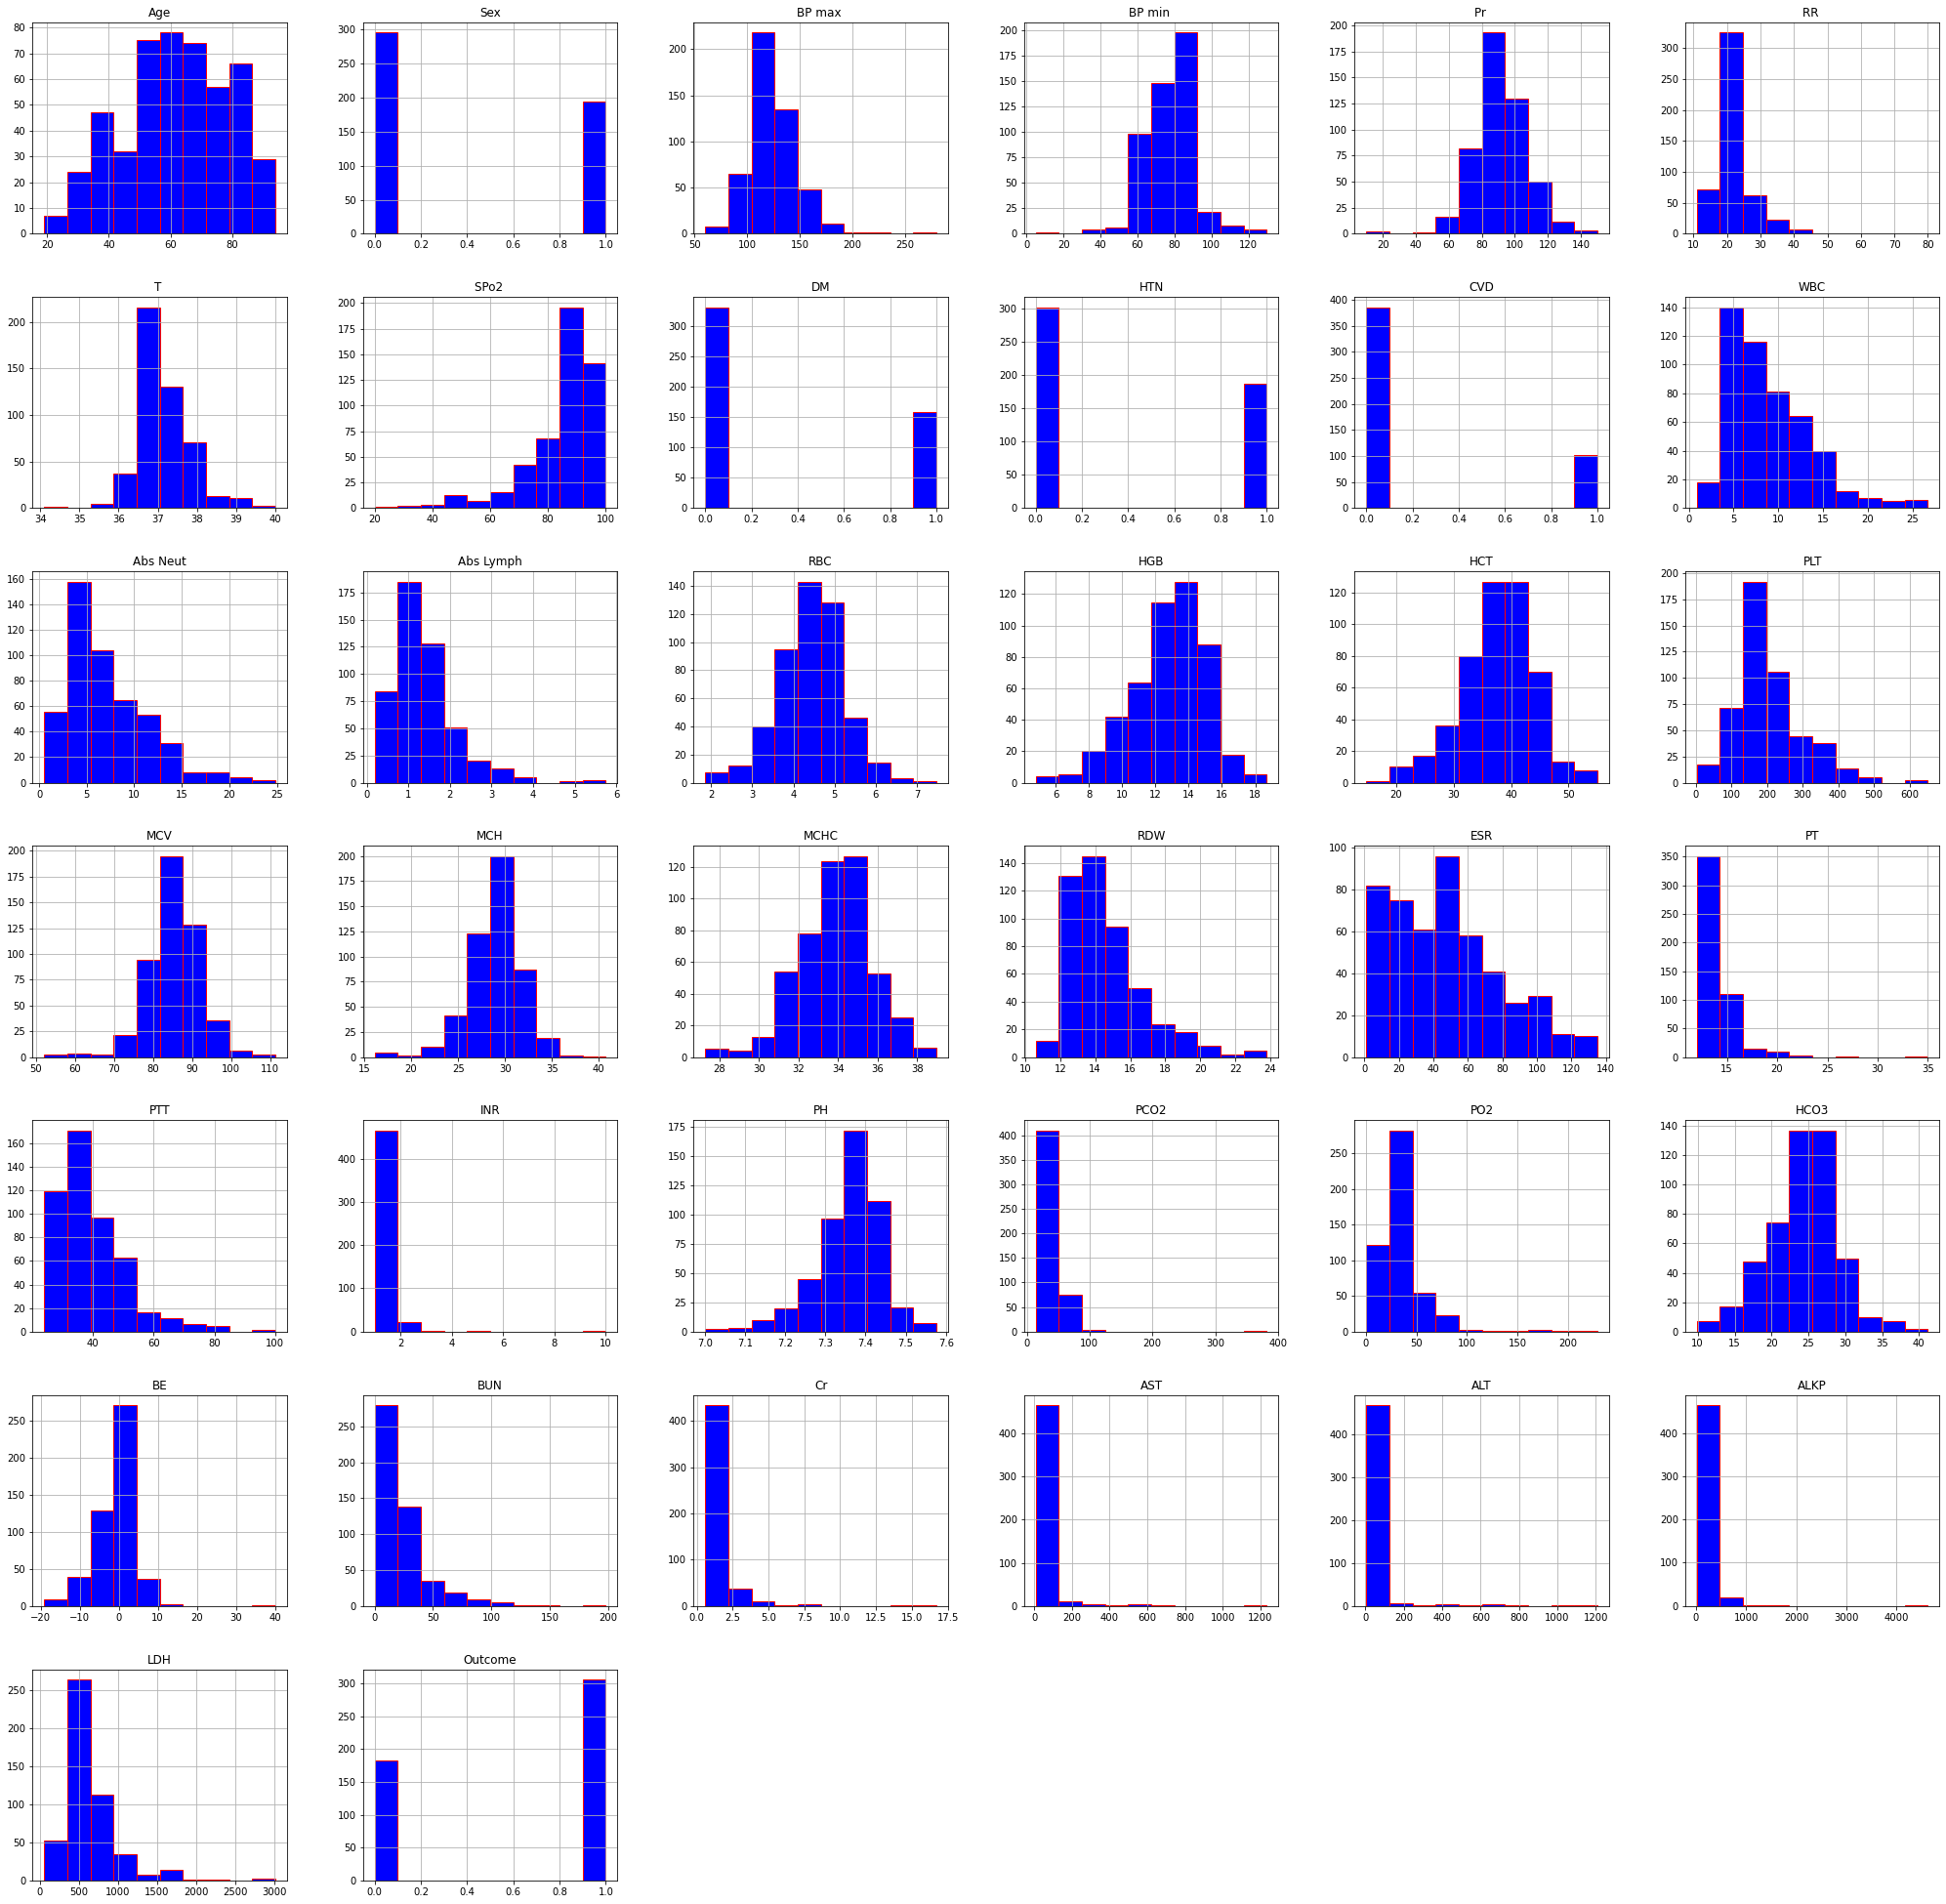

In [15]:
dataset.hist(figsize=(35,35),color='blue',edgecolor='red')

<AxesSubplot:>

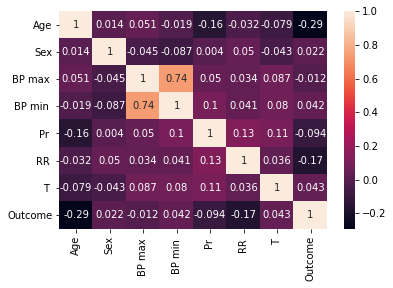

In [16]:
sns.heatmap(dataset.iloc[:,[0,1,2,3,4,5,6,37]].corr(),annot=True)

<AxesSubplot:>

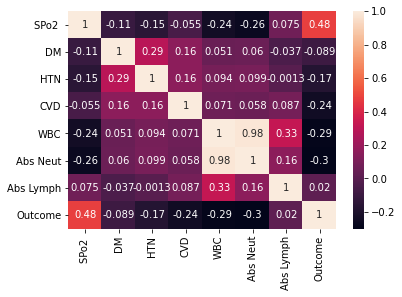

In [17]:
sns.heatmap(dataset.iloc[:,[7,8,9,10,11,12,13,37]].corr(),annot=True)

<AxesSubplot:>

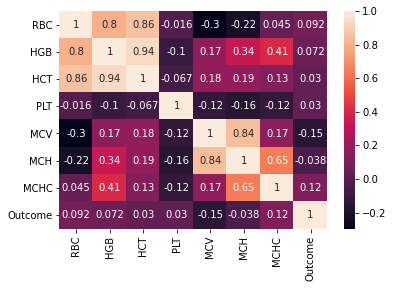

In [18]:
sns.heatmap(dataset.iloc[:,[14,15,16,17,18,19,20,37]].corr(),annot=True)

<AxesSubplot:>

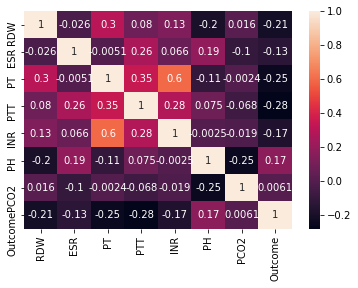

In [19]:
sns.heatmap(dataset.iloc[:,[21,22,23,24,25,26,27,37]].corr(),annot=True)

<AxesSubplot:>

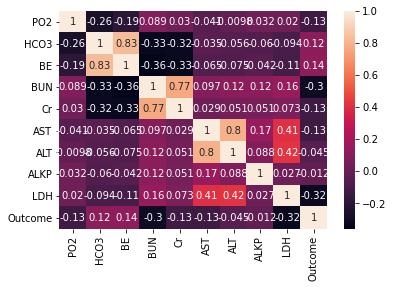

In [20]:
sns.heatmap(dataset.iloc[:,28:].corr(),annot=True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age distribution'}, xlabel='Age', ylabel='Density'>

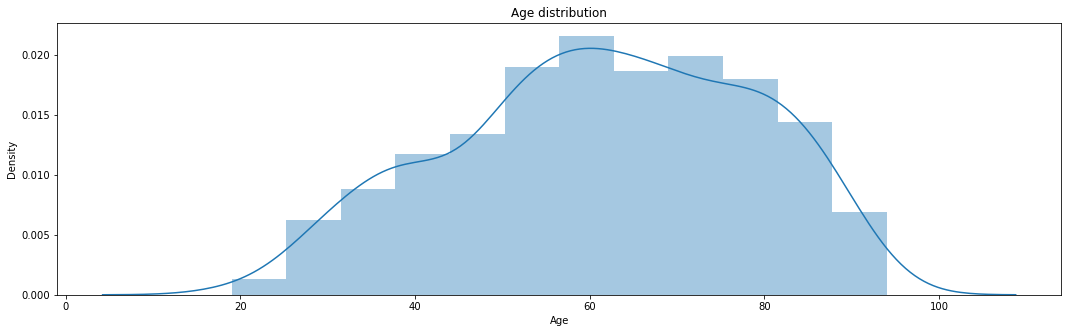

In [21]:
plt.figure(figsize=(18,5))
plt.title('Age distribution')
sns.distplot(dataset['Age'])

<AxesSubplot:title={'center':'Age with Outcome(suvived and dead)'}, ylabel='Age'>

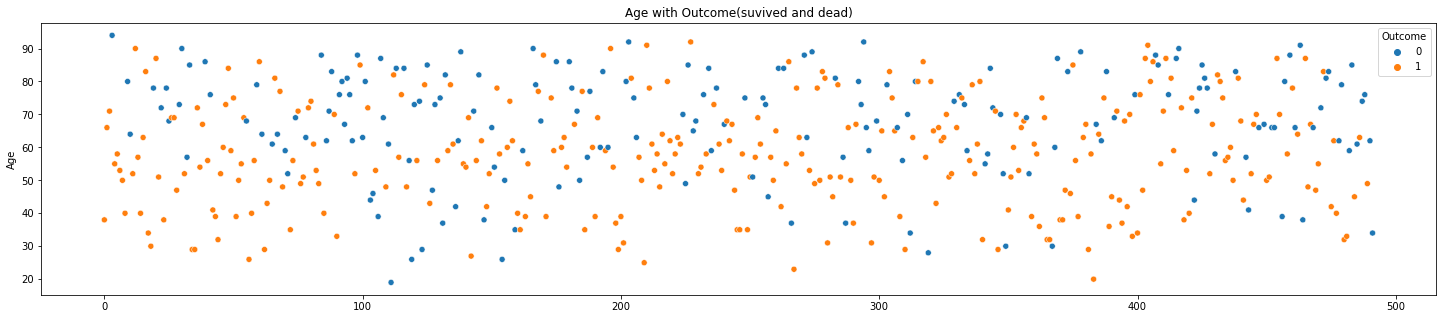

In [22]:
plt.figure(figsize=(25,5))
plt.title("Age with Outcome(suvived and dead)")
sns.scatterplot(x=dataset.index, y=dataset['Age'], hue=dataset.Outcome)

<AxesSubplot:ylabel='None'>

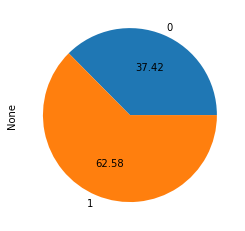

In [23]:
dataset.groupby('Outcome').size().plot(kind='pie', autopct='%.2f')

# Balancing The Dataset

In [25]:
smote=SMOTE()
balanced_x,balanced_y=smote.fit_resample(dataset.iloc[:,0:37],dataset.iloc[:,37])
print(balanced_x.shape)
print(balanced_y.shape)

(612, 37)
(612,)


In [26]:
balanced_y.value_counts()

0    306
1    306
Name: Outcome, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

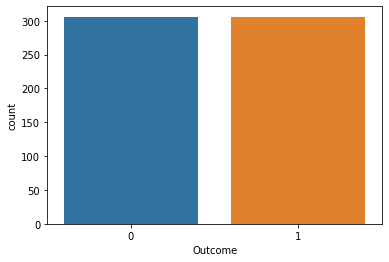

In [27]:
sns.countplot(balanced_y)

# Splitting and Training The models

In [28]:
real_x=balanced_x.iloc[:,[0,5,7,9,10,11,12,18,20,21,22,23,24,25,26,28,30,31,36]]
real_y=balanced_y
print(real_x.shape)
print(real_y.shape)

(612, 19)
(612,)


In [29]:
train_x,test_x,train_y,test_y=train_test_split(real_x,real_y,test_size=0.3,random_state=123)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(428, 19)
(428,)
(184, 19)
(184,)


### Using Random Forest Classifier

In [30]:
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
accuracy_rf=metrics.accuracy_score(test_y,pred)
print("The confussion metrix for Random forest is:\n",metrics.confusion_matrix(test_y,pred))
print("The accuracy of Random Forest Classifier is:\t\t",metrics.accuracy_score(test_y,pred))
print("The recal score of Random Forest Classifier is:\t\t",metrics.recall_score(test_y,pred))
print("The precision of Random Forest Classifier is:\t\t",metrics.precision_score(test_y,pred))
print("The f1 score of Random Forest Classifier is:\t\t",metrics.f1_score(test_y,pred))

The confussion metrix for Random forest is:
 [[78 16]
 [14 76]]
The accuracy of Random Forest Classifier is:		 0.8369565217391305
The recal score of Random Forest Classifier is:		 0.8444444444444444
The precision of Random Forest Classifier is:		 0.8260869565217391
The f1 score of Random Forest Classifier is:		 0.8351648351648352


### Using Decision Tree Classifier

In [31]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred_dtc=dtc.predict(test_x)
accuracy_dsc=metrics.accuracy_score(test_y,pred_dtc)
print("The confussion metrix for Decision Tree is:\n",metrics.confusion_matrix(test_y,pred_dtc))
print("The accuracy of Decision Tree Classifier is:\t\t",accuracy_dsc)
print("The recal score of Decision Tree Classifier is:\t\t",metrics.recall_score(test_y,pred_dtc))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_y,pred_dtc))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_y,pred_dtc))

The confussion metrix for Decision Tree is:
 [[67 27]
 [18 72]]
The accuracy of Decision Tree Classifier is:		 0.7554347826086957
The recal score of Decision Tree Classifier is:		 0.8
The precision of Decision Tree Classifier is:		 0.7272727272727273
The f1 score of Decision Tree Classifier is:		 0.761904761904762


### Using Logistic Regression 

In [32]:
lr=LogisticRegression(max_iter=5000)
lr.fit(train_x,train_y)
pred_lr=lr.predict(test_x)
accuracy_lr=metrics.accuracy_score(test_y,pred_lr)
print("The confussion metrix for Logistic Regression is:\n",metrics.confusion_matrix(test_y,pred_lr))
print("The accuracy of Logistic Regression is:\t\t",accuracy_lr)
print("The recal score Logistic Regression is:\t\t",metrics.recall_score(test_y,pred_lr))
print("The precision Logistic Regression is:\t\t",metrics.precision_score(test_y,pred_lr))
print("The f1 score Logistic Regression is:\t\t",metrics.f1_score(test_y,pred_lr))

The confussion metrix for Logistic Regression is:
 [[73 21]
 [17 73]]
The accuracy of Logistic Regression is:		 0.7934782608695652
The recal score Logistic Regression is:		 0.8111111111111111
The precision Logistic Regression is:		 0.776595744680851
The f1 score Logistic Regression is:		 0.7934782608695652


### Using AdaBoost Classifier 

In [33]:
ada=AdaBoostClassifier()
ada.fit(train_x,train_y)
pred_ada=ada.predict(test_x)
accuracy_ada=metrics.accuracy_score(test_y,pred_ada)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_y,pred_ada))
print("The accuracy of AdaBoost Classifier is:\t\t",accuracy_ada)
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_y,pred_ada))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_y,pred_ada))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_y,pred_ada))

The confussion metrix for AdaBoost is:
 [[69 25]
 [14 76]]
The accuracy of AdaBoost Classifier is:		 0.7880434782608695
The recal score of AdaBoost Classifier is is:		 0.8444444444444444
The precision of AdaBoost Classifier is:		 0.7524752475247525
The f1 score of AdaBoost Classifier is:		 0.7958115183246073


### Using KNN Classifier 

In [34]:
kn=KNeighborsClassifier()
kn.fit(train_x,train_y)
pred_kn=kn.predict(test_x)
accuracy_knn=metrics.accuracy_score(test_y,pred_kn)
print("The confussion metrix for KNN Classifier is:\n",metrics.confusion_matrix(test_y,pred_kn))
print("The accuracy of KNN Classifier is:\t\t",accuracy_knn)
print("The recal score of KNN Classifier is is:\t\t",metrics.recall_score(test_y,pred_kn))
print("The precision of KNN Classifier is:\t\t",metrics.precision_score(test_y,pred_kn))
print("The f1 score of KNN Classifier is:\t\t",metrics.f1_score(test_y,pred_kn))

The confussion metrix for KNN Classifier is:
 [[67 27]
 [24 66]]
The accuracy of KNN Classifier is:		 0.7228260869565217
The recal score of KNN Classifier is is:		 0.7333333333333333
The precision of KNN Classifier is:		 0.7096774193548387
The f1 score of KNN Classifier is:		 0.7213114754098361


In [37]:
svc=SVC()
svc.fit(train_x,train_y)
pred_svc=svc.predict(test_x)
accuracy_svm=metrics.accuracy_score(test_y,pred_svc)
print("The confussion metrix for SVM Classifier is:\n",metrics.confusion_matrix(test_y,pred_svc))
print("The accuracy of SVM Classifier is:\t\t",accuracy_svm)
print("The recal score of SVM Classifier is is:\t\t",metrics.recall_score(test_y,pred_svc))
print("The precision of SVM Classifier is:\t\t",metrics.precision_score(test_y,pred_svc))
print("The f1 score of SVM Classifier is:\t\t",metrics.f1_score(test_y,pred_svc))

The confussion metrix for SVM Classifier is:
 [[58 36]
 [17 73]]
The accuracy of SVM Classifier is:		 0.7119565217391305
The recal score of SVM Classifier is is:		 0.8111111111111111
The precision of SVM Classifier is:		 0.6697247706422018
The f1 score of SVM Classifier is:		 0.7336683417085427


Text(0.5, 1.0, 'Comparision of Models based on  their ACCURACY')

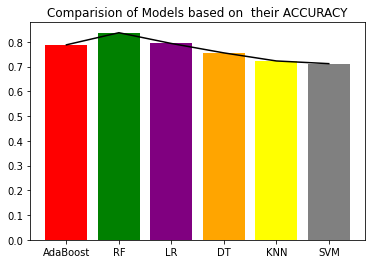

In [39]:
plt.bar(['AdaBoost','RF','LR','DT','KNN','SVM'],[accuracy_ada,accuracy_rf,accuracy_lr,accuracy_dsc,accuracy_knn,accuracy_svm],color=['red','green','purple','orange','yellow','grey'])
plt.plot([accuracy_ada,accuracy_rf,accuracy_lr,accuracy_dsc,accuracy_knn,accuracy_svm],color='black')
plt.title('Comparision of Models based on  their ACCURACY')

From the above results we can conclude that "Random Forest Classifier" is our best performing model with F1 score of 0.84,and the factors which affects the most in the death of a covid patient are SPo2,CVD,PH,BE,PTT,LDH,BUN.